# Predicting Heart Disease using Machine Learning

![image-alt-text](https://i.ibb.co/hDphhrF/ezgif-com-gif-maker.jpg)


## 1. Problem Definition

The problem we will be exploring is binary classification (a target can only be one of two things).

Here, we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

This Dataset taken from Kaggle for practice purpose, This dataset contain around 17 independent variables and 1 dependent variable.

Below are column names and their data type in Dataset-

| Variable | Datatype | Variable Type |
| --- | --- | --- |
|HeartDisease|object|Dependent Variable|
|BMI|float64|Independent Variable|
|Smoking|object|Independent Variable|
|AlcoholDrinking|object|Independent Variable|
|Stroke|object|Independent Variable|
|PhysicalHealth|float64|Independent Variable|
|MentalHealth|float64|Independent Variable|
|DiffWalking|object|Independent Variable|
|Sex|object|Independent Variable|
|AgeCategory|object|Independent Variable|
|Race|object|Independent Variable|
|Diabetic|object|Independent Variable|
|PhysicalActivity|object|Independent Variable|
|GenHealth|object|Independent Variable|
|SleepTime|float64|Independent Variable|
|Asthma|object|Independent Variable|
|KidneyDisease|object|Independent Variable|
|SkinCancer|object|Independent Variable|

### i. Import Regular Libraries

In [1]:
conda install -c conda-forge imbalanced-learn

StatementMeta(deaudiprod, 54, 1, Finished, Available)

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use u

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings("ignore") #It will disable warnings in notebook

# allows matplotlib to be inline
%matplotlib inline

StatementMeta(deaudiprod, 54, 2, Finished, Available)

### ii. Load Heart Disease Dataset in notebook

In [3]:
%%pyspark
df = spark.read.load('abfss://de-audi-prod@deaudiprod.dfs.core.windows.net/ml_demo/demo_ml_heart_disease_data.csv', format='csv'
).toPandas()

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

StatementMeta(deaudiprod, 54, 3, Finished, Available)

## 3. Data Exploration (Exploratory Data Analysis or EDA)

Once we've imported a dataset, the next step is to explore. There's no set way of doing this. But what we should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to data dictionary and remind ourself of what different columns mean.

Our goal is to become a subject matter expert on the dataset we're working with. So if someone asks us a question about it, we can give them an explanation and when we start building models, we can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list we might want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of data?

###  a. Data Understanding

In [4]:
#This will show top 5 rows from data, by which we will try to understand it.
df.head(5)

StatementMeta(deaudiprod, 54, 4, Finished, Available)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
4,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
5,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### i. Analysis of Numeric Features

since few columns in dataset should be numeric but currently they are string. so we will change their datatype before proceeding further

In [5]:
numeric_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

StatementMeta(deaudiprod, 54, 5, Finished, Available)

In [6]:
df.describe().T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

StatementMeta(deaudiprod, 54, 6, Finished, Available)

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


1. Here, we can see that there is an extremely high value of BMI and SleepTime.

StatementMeta(deaudiprod, 54, 7, Finished, Available)

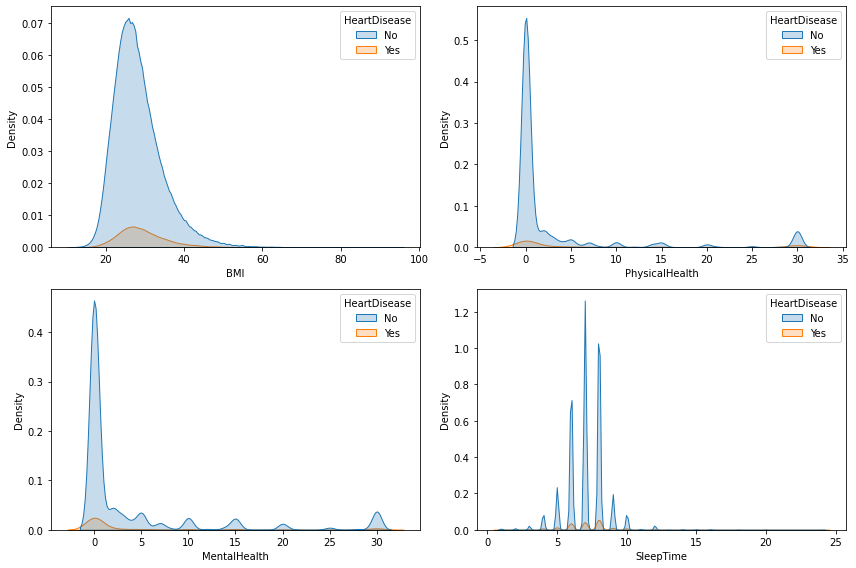

In [7]:
nrows, ncols = 2, 2
combine_features = df[numeric_cols]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df[numeric_cols],x = df[name_feature] , hue=df["HeartDisease"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

StatementMeta(deaudiprod, 54, 8, Finished, Available)

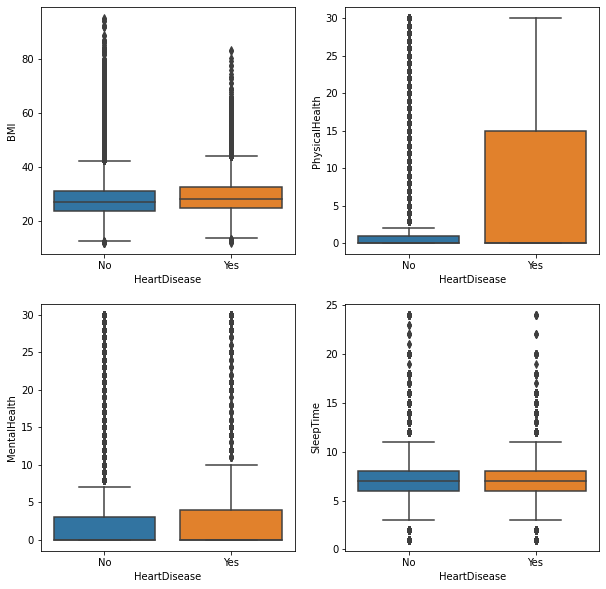

In [8]:
#Boxlot analysis

i = 1
plt.figure(figsize = (10,10))
for feature in numeric_cols:
    plt.subplot(2,2,i)
    sns.boxplot(x = 'HeartDisease', y = feature, data = df)
    i +=1

Here, we can see from above figures that there are outliers in every numeric columns. We will treat them before ingesting data into model.

StatementMeta(deaudiprod, 54, 9, Finished, Available)

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

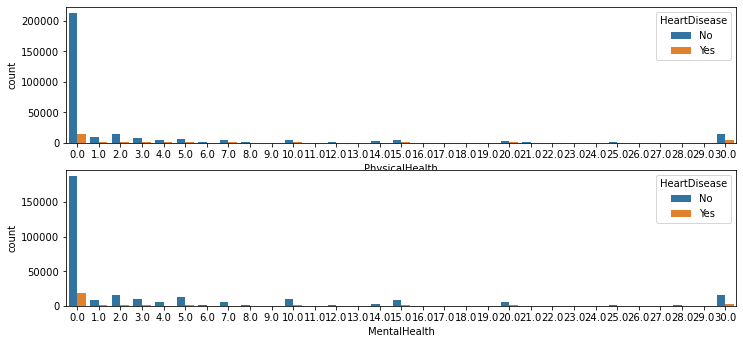

In [9]:
plt.rcParams['figure.figsize'] = (12,5.5)
fig, ax = plt.subplots(2,1)
sns.countplot(x='PhysicalHealth', hue="HeartDisease", data=df, ax=ax[0])
sns.countplot(x='MentalHealth', hue="HeartDisease", data=df, ax=ax[1])

From, the above count plot for Physical Health and Mental Health we can see that for most of the People it is zero, thatis fine. But also, for some people it is extrenly high i.e. 30 which seems abnormal

StatementMeta(deaudiprod, 54, 10, Finished, Available)

<AxesSubplot:xlabel='MentalHealth', ylabel='count'>

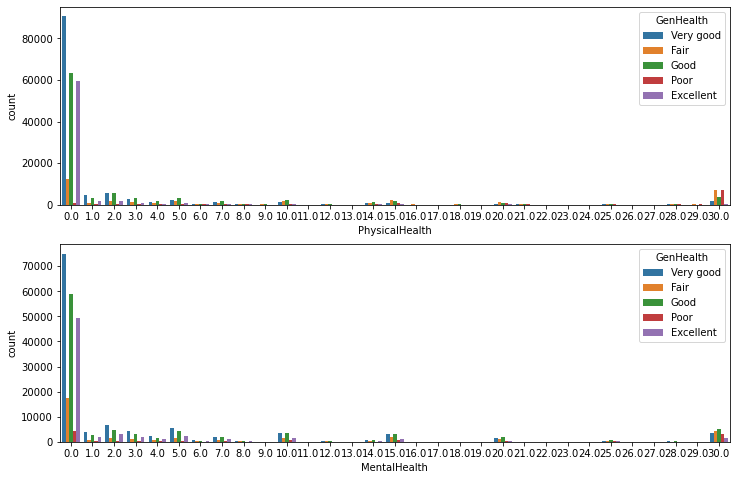

In [10]:
plt.rcParams['figure.figsize'] = (12,8)
fig, ax = plt.subplots(2,1)
sns.countplot(x='PhysicalHealth', hue="GenHealth", data=df, ax=ax[0])
sns.countplot(x='MentalHealth', hue="GenHealth", data=df, ax=ax[1])

Again, here we can see that for the person having General health is Very Good, Good, Excellent the Physcial Health and Menatl Health is Zero on the other hand person having Phycisal Health and Mental Health as Poor or Fair are having General health as 30. Means, Here we can assume that with increasing number in the Physcial Health and Mental health  the Gen health condition is not good

#### ii. Analysis of Categorical Features

In [11]:
df.describe(include='O').T.style.set_properties(**{'background-color': '#FFFF99','color': 'black','border-color': 'white'})

StatementMeta(deaudiprod, 54, 11, Finished, Available)

,count,unique,top,freq
0,,,,
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653


StatementMeta(deaudiprod, 54, 12, Finished, Available)

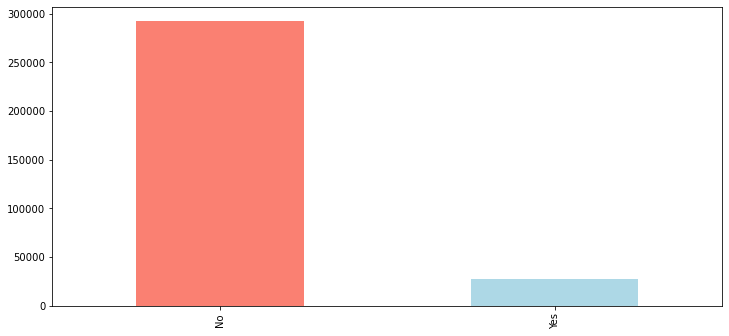

In [12]:
#Let's see how many positive (1) and negative (0) samples we have in our dataframe
plt.rcParams['figure.figsize'] = (12,5.5)
df['HeartDisease'].value_counts()

%matplotlib inline
# Plot the value counts with a bar graph
df['HeartDisease'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

Here, in the barplot we can see that our data is not balanced, as the count of "No" is very high as compare to "Yes". So, we would need to takecare for this when we will create a model

StatementMeta(deaudiprod, 54, 13, Finished, Available)

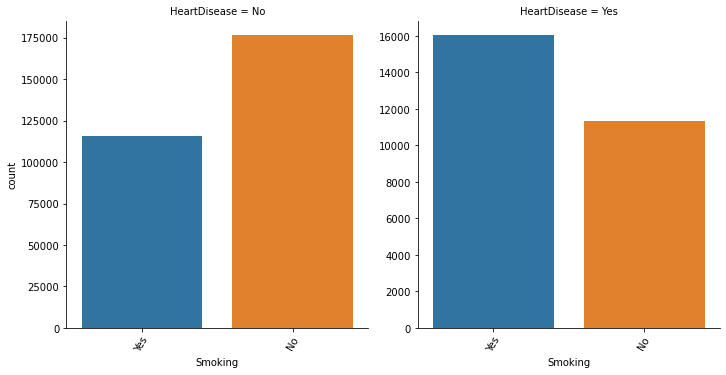

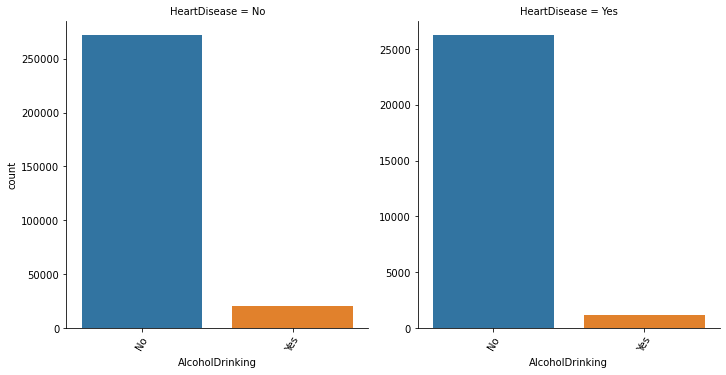

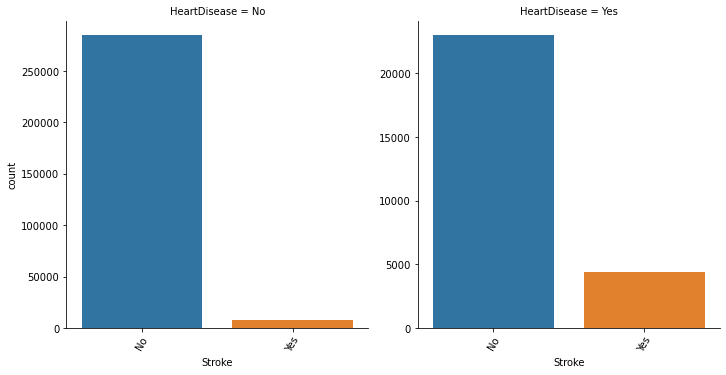

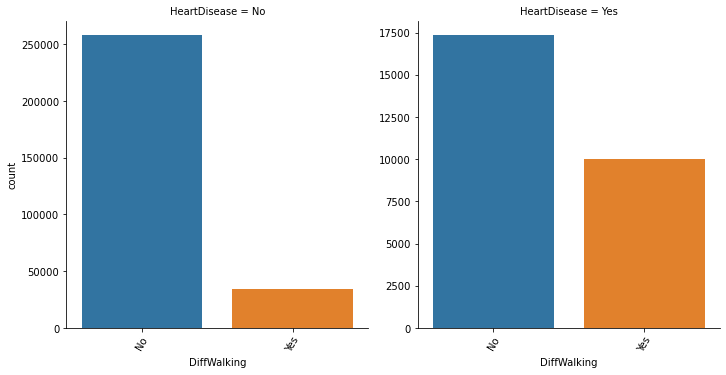

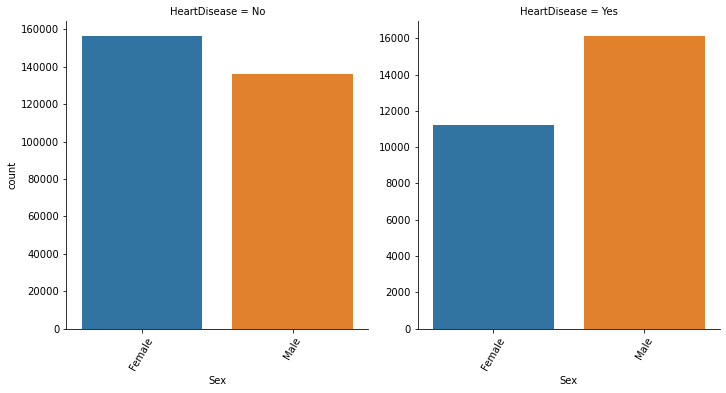

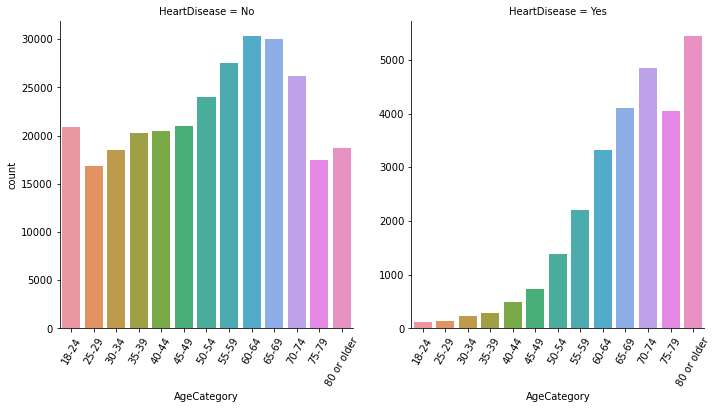

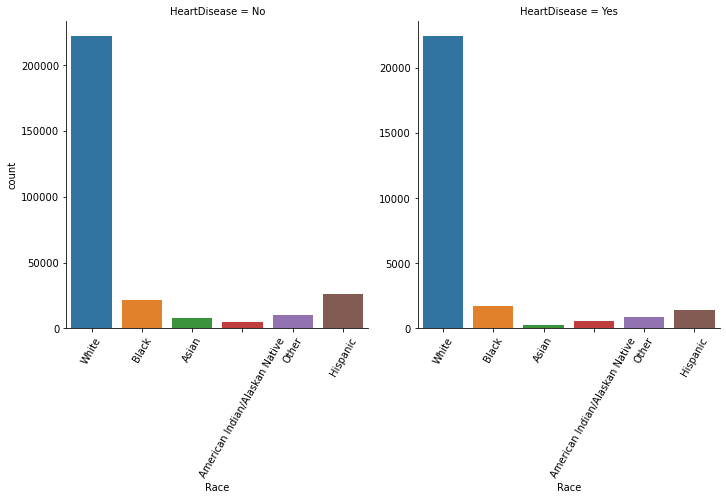

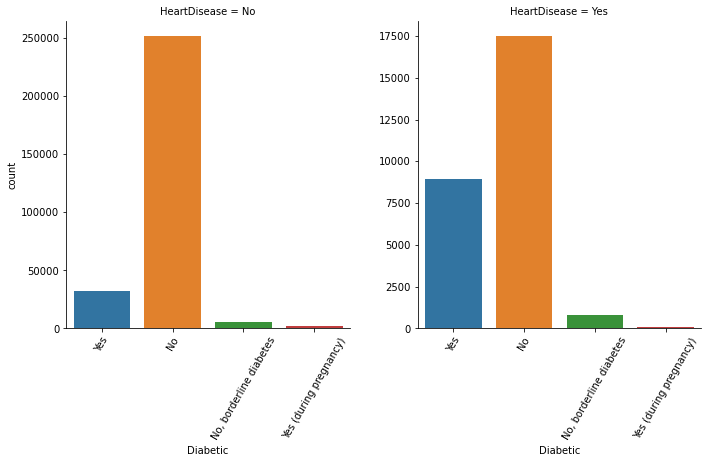

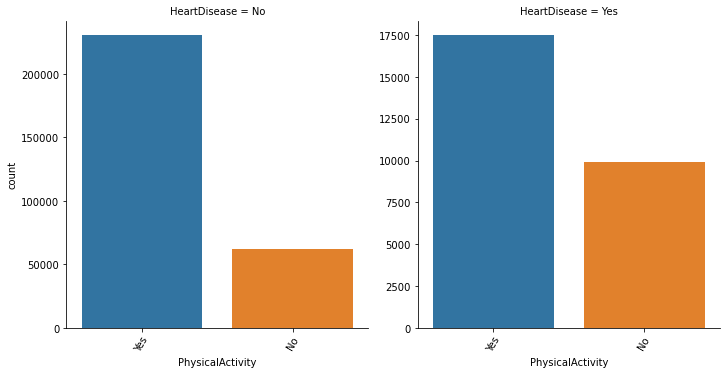

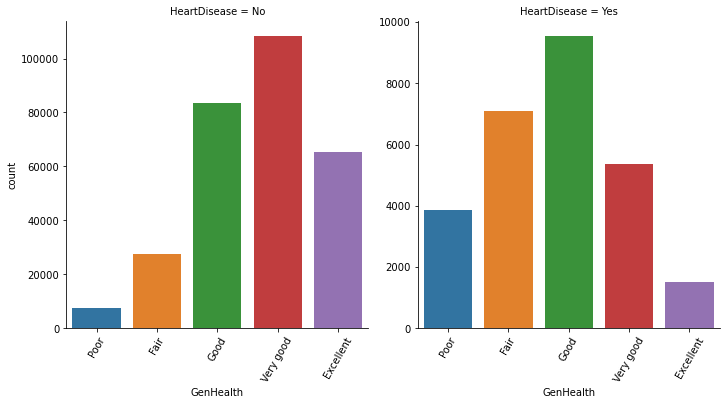

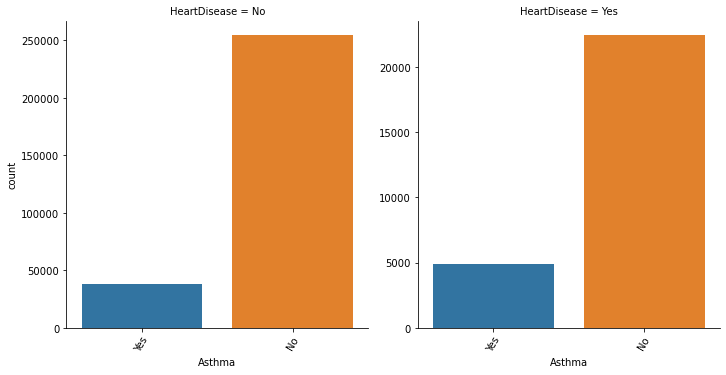

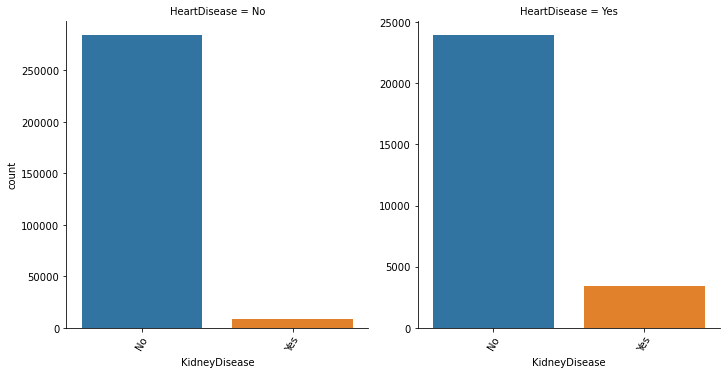

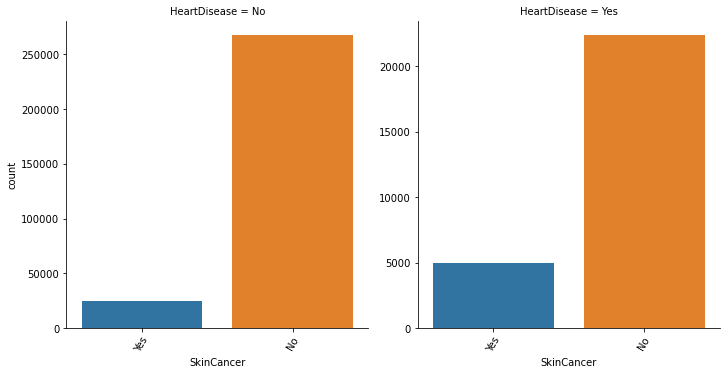

In [13]:
for col in df.select_dtypes(include='object'):
    if col != 'HeartDisease':
        if col != 'GenHealth' and col != 'AgeCategory':
            # print(col)
            graph = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
        elif col == 'GenHealth':
            graph = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False, order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
        else:
            graph = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False, order = ['18-24', '25-29', '30-34', '35-39', '40-44','45-49', '50-54', '55-59', '60-64', '65-69',  '70-74', '75-79', '80 or older'])
        graph.set_xticklabels(rotation=60)

###  b. Data Pre-Processing

#### i. Check Duplicate Records

In [14]:
#Check if there are any duplicate rows in dataframe, if so we will delete the duplicate rows
print('Duplicated Rows in DataFrame (Before) = '+str(df.duplicated().sum()))

#Drop Dupliacte rows from dataframe-
df.drop_duplicates(inplace= True)
print('Duplicated Rows in DataFrame (After) = '+str(df.duplicated().sum()))

StatementMeta(deaudiprod, 54, 14, Finished, Available)

Duplicated Rows in DataFrame (Before) = 18078
Duplicated Rows in DataFrame (After) = 0


#### ii. Missing value Analysis

In [15]:
df.isna().sum()

StatementMeta(deaudiprod, 54, 15, Finished, Available)

0
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Here, we can see that there are no missing values in the dataset. So, we are good to go

#### iii. Outlier Analysis

We have already seen in Box Plot above that there are outliers in the data, now here first we will see the outlier range and percentage of outlier in  individual numeric variable and than we will treat them accordingly.

StatementMeta(deaudiprod, 54, 16, Finished, Available)

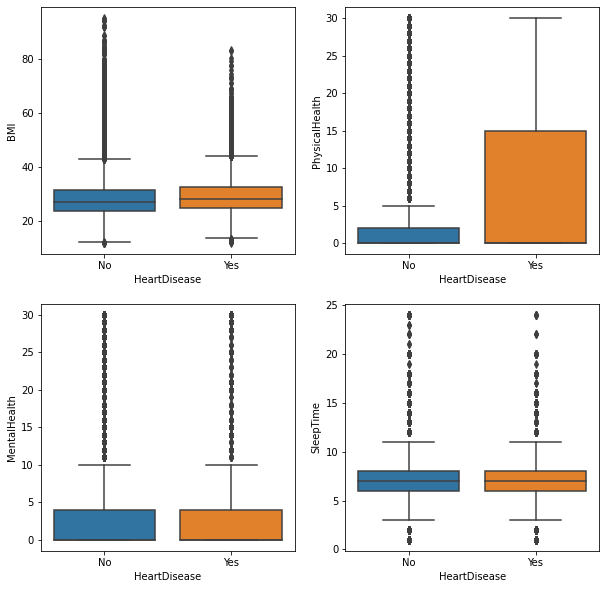

In [16]:
#Boxlot analysis

i = 1
plt.figure(figsize = (10,10))
for feature in numeric_cols:
    plt.subplot(2,2,i)
    sns.boxplot(x = 'HeartDisease', y = feature, data = df)
    i +=1

Feature boxplots grouped by Heart Decease are depiced in the figure. Since the pink distribution for BMI and Sleep Time has the similar interquartile range, we will delete extreme observations in these columns, as a result we are going to lose only 5% of information. The deletion was conducted based on the lower and upper whiskers of the features box-plots. In case we delete outliers in all float columns, we would lose almost 30% of data, which is too much lost information.

In [17]:
 for i in numeric_cols:
    print(i)
    Q3,Q1= np.percentile(df.loc[:,i],[75,25])
    IQR = Q3-Q1
    minimum= Q1-(IQR*1.5)
    maximum= Q3+(IQR*1.5)
    print('Lower Limit -> '+str(minimum))
    print('Upper Limit -> '+str(maximum))
    print('IQR -> '+str(IQR))
    print('Outlier outside upper limit (%) -> '+str(round(df[df[i] > Q3 + 1.5 * IQR][i].count()/df.shape[0]*100, 2)))
    print('Outlier outside lower limit (%) -> '+str(round(df[df[i]< Q1 - 1.5 * IQR][i].count()/df.shape[0]*100, 2)))
    print('***********************************')

StatementMeta(deaudiprod, 54, 17, Finished, Available)

BMI
Lower Limit -> 12.600000000000005
Upper Limit -> 43.08
IQR -> 7.619999999999997
Outlier outside upper limit (%) -> 2.94
Outlier outside lower limit (%) -> 0.01
***********************************
PhysicalHealth
Lower Limit -> -3.0
Upper Limit -> 5.0
IQR -> 2.0
Outlier outside upper limit (%) -> 15.62
Outlier outside lower limit (%) -> 0.0
***********************************
MentalHealth
Lower Limit -> -6.0
Upper Limit -> 10.0
IQR -> 4.0
Outlier outside upper limit (%) -> 13.16
Outlier outside lower limit (%) -> 0.0
***********************************
SleepTime
Lower Limit -> 3.0
Upper Limit -> 11.0
IQR -> 2.0
Outlier outside upper limit (%) -> 1.06
Outlier outside lower limit (%) -> 0.44
***********************************


In [18]:
df.groupby('HeartDisease').median().T

StatementMeta(deaudiprod, 54, 18, Finished, Available)

HeartDisease,No,Yes
0,,
BMI,27.34,28.34
PhysicalHealth,0.00,0.00
MentalHealth,0.00,0.00
SleepTime,7.00,7.00


Removing outliers and logarithmic transformation

In [19]:
#create dataframe for upper limit and lower limit for each column
whiskers = pd.DataFrame(columns = ['LowerW', 'UpperW'])

for i in df[numeric_cols]:
    median = np.median(df[i])
    upper_quartile = np.percentile(df[i], 75)
    lower_quartile = np.percentile(df[i], 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = df[i][df[i]<=upper_quartile+1.5*iqr].max()
    lower_whisker = df[i][df[i]>=lower_quartile-1.5*iqr].min()

    
    whiskers.loc[i] = [lower_whisker]+ [upper_whisker]
whiskers

StatementMeta(deaudiprod, 54, 19, Finished, Available)

,LowerW,UpperW
BMI,12.65,43.08
PhysicalHealth,0.00,5.00
MentalHealth,0.00,10.00
SleepTime,3.00,11.00


In [20]:
# Delete outliers based on the results from the Box-plot
# Removing outliers in BMI and Sleep Time features

df_out = df.loc[(df["BMI"]<=whiskers.loc["BMI","UpperW"]) & 
                (df["BMI"]>=whiskers.loc["BMI","LowerW"]) & 
                (df["SleepTime"]<=whiskers.loc["SleepTime","UpperW"]) &
                (df["SleepTime"]>=whiskers.loc["SleepTime","LowerW"])]
df_out=df_out.reset_index(drop = True)
df_out[numeric_cols].describe().T

StatementMeta(deaudiprod, 54, 20, Finished, Available)

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
BMI,288496.0,27.819583,5.381108,12.65,23.83,27.26,31.19,43.08
PhysicalHealth,288496.0,3.376061,7.902890,0.00,0.00,0.00,2.00,30.00
MentalHealth,288496.0,3.981930,7.970503,0.00,0.00,0.00,4.00,30.00
SleepTime,288496.0,7.052340,1.254272,3.00,6.00,7.00,8.00,11.00


In [21]:
# As a result we lost less then 5% of data
((len(df_out)- len(df))/len(df))*100

StatementMeta(deaudiprod, 54, 21, Finished, Available)

-4.381920806583653

In [22]:
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df_out[numeric_cols].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

StatementMeta(deaudiprod, 54, 22, Finished, Available)

,Skew
0,
PhysicalHealth,2.611112
MentalHealth,2.300539


Physical and Mental Health are still heavily skewed. I am going to apply logarithmic transformation to these features for better model performance.

In [23]:
df_log = df_out.copy()

for col in skew_cols.index.values:
    df_log[col] = df_out[col].apply(np.log1p)
    
skew_vals_aft = df_log[numeric_cols].skew()
skew_cols_aft = (skew_vals_aft
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols_aft

StatementMeta(deaudiprod, 54, 23, Finished, Available)

,Skew
0,
PhysicalHealth,1.565659
MentalHealth,1.150896


BMI and Sleep Time are more normally distributed after the outliers are deleted. After the log transformation Physical and Mental Health are less skewed, but still far from normal. In the figure below the float features after the transformation are plotted.

StatementMeta(deaudiprod, 54, 24, Finished, Available)

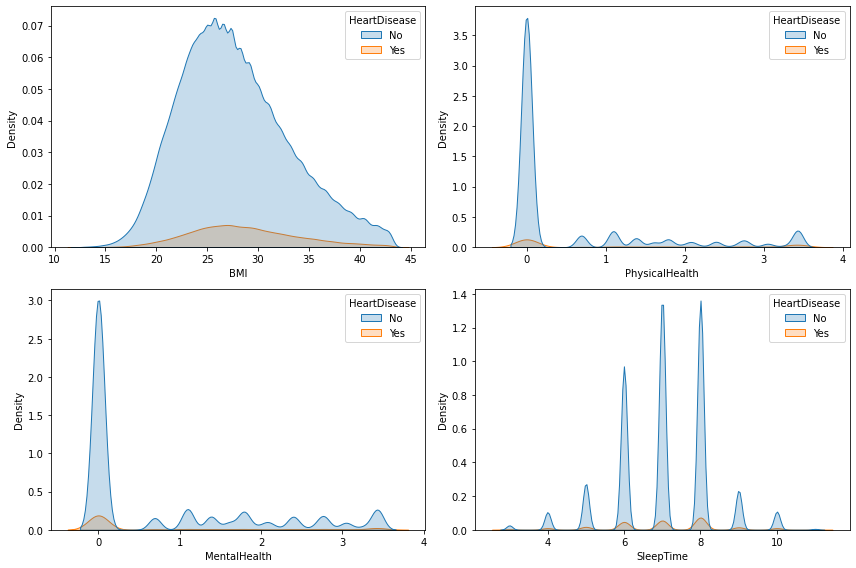

In [24]:
nrows, ncols = 2, 2
combine_features = df_log[numeric_cols]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=df_log[numeric_cols],x = df_log[name_feature] , hue=df_log["HeartDisease"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

#### iv. Feature Selection

- ##### Correlation Analysis for Numeric Variables

StatementMeta(deaudiprod, 54, 25, Finished, Available)

<AxesSubplot:xlabel='0', ylabel='0'>

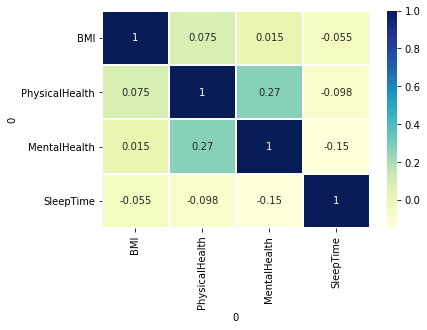

In [25]:
corrmat = df_log.corr()
# print(corrmat)
f, ax = plt.subplots(figsize =(6, 4))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

From Correlation Plot we can see that only Physcial Health and Mental health are slightly correlated with each other.

- #####  Chi-Square Test to check hypothesis assumption between Categorical Indepedent and Target Variable

In [26]:
# list of categorical columns name
cat_cols = []
for col in df_log.select_dtypes(include='object'):
    # print(col)
    cat_cols.append(col)

StatementMeta(deaudiprod, 54, 26, Finished, Available)

In [27]:
from scipy.stats import chi2_contingency
for feature in cat_cols[1:]:
    data_crosstab = pd.crosstab(df_log['HeartDisease'], 
                            df_log[feature],
                                )
    print(data_crosstab,"\n")
    c, p, dof, expected = chi2_contingency(data_crosstab)
    if p<.05:
        comment="There is a significant association between those varibles "
    else:
        comment="There is no association those varibles"
    print('p-value is',p,comment,"\n")
    print('*****************************************************')

StatementMeta(deaudiprod, 54, 27, Finished, Available)

Smoking           No     Yes
HeartDisease                
No            156499  106469
Yes            10565   14963 

p-value is 0.0 There is a significant association between those varibles  

*****************************************************
AlcoholDrinking      No    Yes
HeartDisease                  
No               243074  19894
Yes               24466   1062 

p-value is 5.510264590614578e-89 There is a significant association between those varibles  

*****************************************************
Stroke            No   Yes
HeartDisease              
No            255768  7200
Yes            21523  4005 

p-value is 0.0 There is a significant association between those varibles  

*****************************************************
DiffWalking       No    Yes
HeartDisease               
No            232543  30425
Yes            16650   8878 

p-value is 0.0 There is a significant association between those varibles  

************************************************

With the help of Chi-Square test result our hypothesis assumtion says that Alternate Hypothesis is True, means each variable individually contributing to define our Target Variable.

In [28]:
features=[ 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feature in features:
    data_crosstab = pd.crosstab(df_log['HeartDisease'], 
                            df_log[feature],
                                margins = False)
    A=data_crosstab.iloc[0,0]
    B=data_crosstab.iloc[0,1]
    C=data_crosstab.iloc[1,0]
    D=data_crosstab.iloc[1,1]
   
    E=D/(C+D)*100
    F=C/(A+C)*100
    G=D/(B+D)*100
    print(f"There is {E:.2f}% probability  if someone has heart disease and the person is {feature}")
    print(f"There is a {F:.2f}% non {feature} person has heart disease,There is a {G:.2f}% {feature} person has heart disease ","\n")

StatementMeta(deaudiprod, 54, 28, Finished, Available)

There is 58.61% probability  if someone has heart disease and the person is Smoking
There is a 6.32% non Smoking person has heart disease,There is a 12.32% Smoking person has heart disease  

There is 4.16% probability  if someone has heart disease and the person is AlcoholDrinking
There is a 9.14% non AlcoholDrinking person has heart disease,There is a 5.07% AlcoholDrinking person has heart disease  

There is 15.69% probability  if someone has heart disease and the person is Stroke
There is a 7.76% non Stroke person has heart disease,There is a 35.74% Stroke person has heart disease  

There is 34.78% probability  if someone has heart disease and the person is DiffWalking
There is a 6.68% non DiffWalking person has heart disease,There is a 22.59% DiffWalking person has heart disease  

There is 59.58% probability  if someone has heart disease and the person is Sex
There is a 6.81% non Sex person has heart disease,There is a 11.11% Sex person has heart disease  

There is 65.22% proba

#### v. Feature Scaling

In [29]:
df_scaled = df_log.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_scaled[['BMI','SleepTime','PhysicalHealth', 'MentalHealth']])
df_scaled[['BMI','SleepTime','PhysicalHealth', 'MentalHealth']] = sc.transform(df_scaled[['BMI','SleepTime','PhysicalHealth', 'MentalHealth']])

StatementMeta(deaudiprod, 54, 29, Finished, Available)

#### vi. Encoding Categorical Features

In [30]:
# here all groups in categorical variables are described

categ_list = list(df_scaled[cat_cols])
for i in categ_list:
    print(i)
    print(df_scaled[i].unique())
    
yes_no_cols = ['HeartDisease','SkinCancer','KidneyDisease','Asthma','PhysicalActivity','DiffWalking','Smoking',
'AlcoholDrinking','Stroke']

StatementMeta(deaudiprod, 54, 30, Finished, Available)

HeartDisease
['No' 'Yes']
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
SkinCancer
['Yes' 'No']


In [31]:
mapping_Genhealth={'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
mapping_AgeCategory ={'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
 '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
mapping_sex = {'Female':0, 'Male':1}
mapping_race = {'White': 0, 'Black':1, 'Asian':2, 'American Indian/Alaskan Native':3, 'Other':4,
 'Hispanic':5}
mapping_diabetic = {'Yes':0, 'No':1, 'No, borderline diabetes':2, 'Yes (during pregnancy)':3}

mapping_yes_no={'Yes':1,'No':0}

StatementMeta(deaudiprod, 54, 31, Finished, Available)

In [32]:
df_scaled[yes_no_cols]=df_scaled[yes_no_cols].replace(mapping_yes_no)
df_scaled['GenHealth']=df_scaled['GenHealth'].map(mapping_Genhealth)
df_scaled['AgeCategory']=df_scaled['AgeCategory'].map(mapping_AgeCategory)
df_scaled['Sex']= df_scaled['Sex'].map(mapping_sex)
df_scaled['Race']= df_scaled['Race'].map(mapping_race)
df_scaled['Diabetic']= df_scaled['Diabetic'].map(mapping_diabetic)
df_scaled.head(5)

StatementMeta(deaudiprod, 54, 32, Finished, Available)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.084999,1,0,0,0.707383,2.325916,0,0,7,0,0,1,3,-1.636283,1,0,1
1,0,-1.389973,0,0,1,-0.571605,-0.678373,0,0,12,0,1,1,3,-0.041730,0,0,0
2,0,-0.230359,1,0,0,2.237255,2.325916,0,1,9,0,0,1,1,0.755547,1,0,0
3,0,-0.670789,0,0,0,-0.571605,-0.678373,0,0,11,0,1,0,2,-0.839007,0,0,1
4,0,-0.763707,0,0,0,2.535044,-0.678373,1,0,4,0,1,1,3,0.755547,0,0,0


In [33]:
#prepared data for model development
data = df_scaled.copy()

StatementMeta(deaudiprod, 54, 33, Finished, Available)

## 4. Machine Learning Model Development

StatementMeta(deaudiprod, 54, 34, Finished, Available)

Before undersampling & oversampling: Counter({0: 262968, 1: 25528})


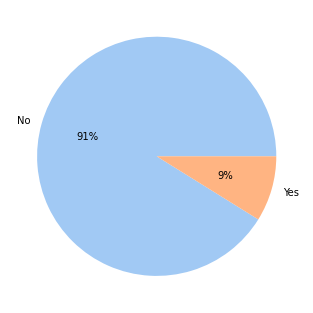

In [34]:
# Check the Target Variable Value Count Percentage
# target = 'HeartDisease'
# featurs = [x for x in data.columns if x != target]
# data[target].value_counts(normalize=True)

from collections import Counter

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Count classes and create pie chart
print(f'Before undersampling & oversampling: {Counter(data["HeartDisease"])}')
plt.pie(data['HeartDisease'].value_counts(), labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%')
plt.show()

The pie chart indicates that the ratio of people who have or do not have heart diseases is very imbalanced. In the 319,795 observations, only 9% of people actually have cardiac diseases. If the algorithm was trained based on the original data, it is highly likely to create a model with extremely high accuracy, since the prediction tends to diagnose cases as negative and the majority of the data is also the negative case (HeartDisease = No).

In order to avoid the above-mentioned issue, one of the approaches is to ensure the percentage of the positive and negative cases is as similar as possible. In this case, we can either delete the negative samples or generate new synthetic samples as the following.

### i. Undersampling

StatementMeta(deaudiprod, 54, 35, Finished, Available)

After undersampling: Counter({0: 51056, 1: 25528})


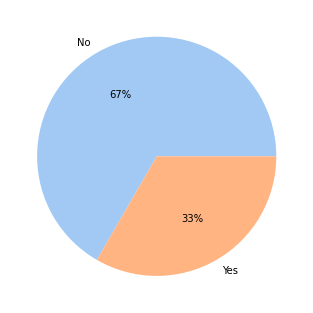

In [35]:
#seperate indepedent and dependent variable in dataset
x = data.iloc[:, 1:] # Remove target variable
y = data['HeartDisease']

# Delete or merge samples in the majority class (HeartDisease = No)
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy=0.5)
x_under, y_under = under_sampler.fit_resample(x, y)

# Count classes and create pie chart
print(f'After undersampling: {Counter(y_under)}')
plt.pie(y_under.value_counts(), labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%');

### ii. Oversampling

StatementMeta(deaudiprod, 54, 36, Finished, Available)

After oversampling: Counter({0: 262968, 1: 262968})


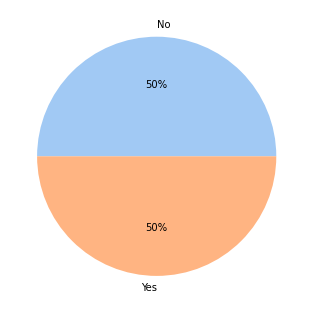

In [36]:
# Duplicate or create new synthetic samples in the minority class (HeartDisease = Yes)
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = over_sampler.fit_resample(x, y)

# Count classes and create pie chart
print(f'After oversampling: {Counter(y_over)}')
plt.pie(y_over.value_counts(), labels = ['No', 'Yes'], colors = colors, autopct='%.0f%%');

From the indices and charts, the imbalanced data was enhanced by undersampling to 67% to 33% or oversampling to 50% to 50%. Although the oversampling technique created a better proportional data, we would use the undersampled data to achieve better model training efficiency.

### iii. train-test Split

Before applying undersampling or oversampling 

In [37]:
# define dataset
X, y = x_under, y_under

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

StatementMeta(deaudiprod, 54, 37, Finished, Available)

In [38]:
# evaluate algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# define dataset
X, y = x_under, y_under

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
	# evaluate the model and collect the results
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores

seed = 1

StatementMeta(deaudiprod, 54, 38, Finished, Available)

### iv Model Building

Here, we will try different ML Moldes and than we will eveulate thier performance and finally we will choose the best fit model on the dataset for prediction purpose. 

Since, we already know that our dataset target variable is categorical varaible, so we will apply different Classification Machine Learning Algorithms on it.

#### a. Random Forest

In [39]:
# Model Development
RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state=0)
RF_Classifier.fit(X_train, y_train)
RF_Pred = RF_Classifier.predict(X_test)
RF_matrix = confusion_matrix(y_test, RF_Pred, labels=[0, 1])

StatementMeta(deaudiprod, 54, 39, Finished, Available)

In [40]:
#Model Evaluation- Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, RF_Pred))

StatementMeta(deaudiprod, 54, 40, Finished, Available)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     15292
           1       0.63      0.59      0.61      7684

    accuracy                           0.75     22976
   macro avg       0.72      0.71      0.71     22976
weighted avg       0.74      0.75      0.75     22976



StatementMeta(deaudiprod, 54, 41, Finished, Available)

>Accuracy 0.750 (0.003)


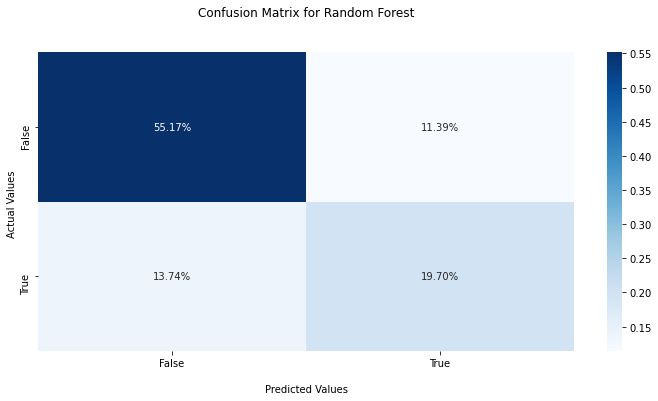

In [41]:
#Model Evaluation- Confusion Matrix
ax = sns.heatmap(RF_matrix/np.sum(RF_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix
scores = evaluate_model(RF_Classifier, X, y)
print('>%s %.3f (%.3f)' % ('Accuracy', mean(scores), std(scores)))
plt.show()

#### b. Bagging

In [42]:
#Model Development
from sklearn.ensemble import BaggingClassifier

# Bagging
Bag = BaggingClassifier(n_estimators = 100, random_state=0)
Bag.fit(X_train, y_train)
Bag_pred = Bag.predict(X_test)
Bag_matrix = confusion_matrix(y_test, Bag_pred, labels=[0, 1])

StatementMeta(deaudiprod, 54, 42, Finished, Available)

In [43]:
#Model Evaluation- Classification Report
print(classification_report(y_test, Bag_pred))

StatementMeta(deaudiprod, 54, 43, Finished, Available)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     15292
           1       0.63      0.58      0.60      7684

    accuracy                           0.75     22976
   macro avg       0.71      0.70      0.71     22976
weighted avg       0.74      0.75      0.74     22976



StatementMeta(deaudiprod, 54, 44, Finished, Available)

>Accuracy 0.745 (0.003)


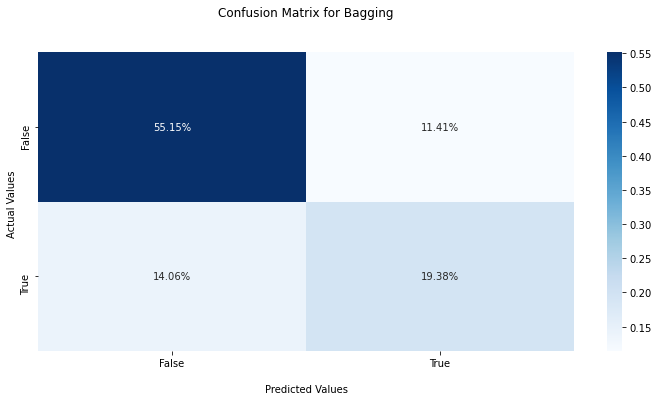

In [44]:
#Model Evaluation- Confusion Matrix
ax = sns.heatmap(Bag_matrix/np.sum(Bag_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Bagging\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix
scores = evaluate_model(Bag, X, y)
print('>%s %.3f (%.3f)' % ('Accuracy', mean(scores), std(scores)))
plt.show()

#### c. Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# AdaBoost
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),  n_estimators = 100, random_state=0)
AdaBoost.fit(X_train, y_train)
AdaBoost_pred = AdaBoost.predict(X_test)
AdaBoost_matrix = confusion_matrix(y_test, AdaBoost_pred, labels=[0, 1])

StatementMeta(deaudiprod, 54, 45, Finished, Available)

In [46]:
#Model Evaluation- Classification Report
print(classification_report(y_test, AdaBoost_pred))

StatementMeta(deaudiprod, 54, 46, Finished, Available)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     15292
           1       0.66      0.61      0.63      7684

    accuracy                           0.76     22976
   macro avg       0.74      0.73      0.73     22976
weighted avg       0.76      0.76      0.76     22976



StatementMeta(deaudiprod, 54, 47, Finished, Available)

>Accuracy 0.764 (0.004)


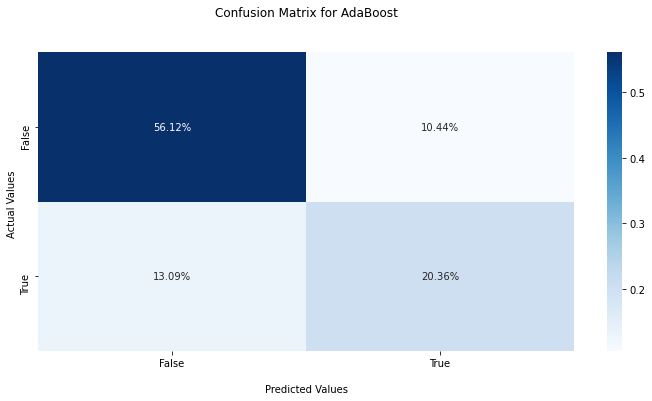

In [47]:
#Model Evaluation- Confusion Matrix
ax = sns.heatmap(AdaBoost_matrix/np.sum(AdaBoost_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for AdaBoost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
scores = evaluate_model(AdaBoost, X, y)
print('>%s %.3f (%.3f)' % ('Accuracy', mean(scores), std(scores)))
plt.show()

In [48]:
from xgboost import XGBClassifier

# XGBoost
XGBoost = XGBClassifier(max_depth = 10, n_estimators = 100, random_state=0);
XGBoost.fit(X_train, y_train);
XGBoost_pred = XGBoost.predict(X_test)
XGBoost_matrix = confusion_matrix(y_test, XGBoost_pred, labels=[0, 1])

import warnings
warnings.filterwarnings('ignore')
print('XGBoost Model is Created!')

StatementMeta(deaudiprod, 54, 48, Finished, Available)

[11:33:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model is Created!


In [49]:
#Model Evaluation- Classification Report
print(classification_report(y_test, XGBoost_pred))

StatementMeta(deaudiprod, 54, 49, Finished, Available)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     15292
           1       0.65      0.59      0.62      7684

    accuracy                           0.76     22976
   macro avg       0.72      0.71      0.72     22976
weighted avg       0.75      0.76      0.75     22976



StatementMeta(deaudiprod, 54, 50, Finished, Available)

[10:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>Accuracy 0.755 (0.001)
[11:34:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

/home/trusted-service-user/cluster-env/clonedenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/trusted-service-user/cluster-env/clonedenv/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/trusted-service-us

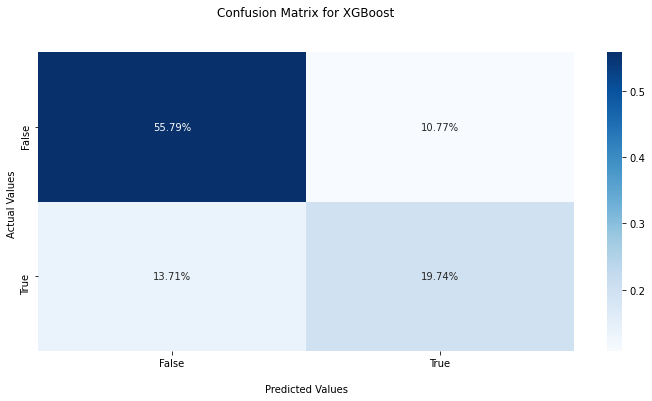

/home/trusted-service-user/cluster-env/clonedenv/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [50]:
#Model Evaluation- Confusion Matrix
ax = sns.heatmap(XGBoost_matrix/np.sum(XGBoost_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for XGBoost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
scores = evaluate_model(XGBoost, X, y)
print('>%s %.3f (%.3f)' % ('Accuracy', mean(scores), std(scores)))
plt.show()

### v. Comparison of the models

In [51]:
# Predict the class for each model
y_pred_loop = list()

coeff_labels = ['Random Forest','Bagging', 'Adaboost', "XGboost"]
coeff_models = [RF_Classifier, Bag,AdaBoost,XGBoost]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred_loop.append(pd.Series(mod.predict(X_test), name=lab))
    coef_label = pd.MultiIndex(levels = [[lab], [0,1]],
                               codes = [[0,0], [0,1]])
    
y_pred_loop = pd.concat(y_pred_loop, axis=1)
y_pred_loop.head()

StatementMeta(deaudiprod, 54, 51, Finished, Available)

,Random Forest,Bagging,Adaboost,XGboost
0,0,0,1,0
1,0,0,0,0
2,1,1,1,1
3,1,0,0,0
4,0,0,0,0


In [52]:
# Creating a table with different metrics for model comparison. 

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score 
    precision = precision_score(y_test, y_pred_loop[lab])
    recall = recall_score(y_test, y_pred_loop[lab])
    fscore = f1_score(y_test, y_pred_loop[lab])
   
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_loop[lab])
    
    # ROC-AUC scores 
    auc = roc_auc_score(y_test,y_pred_loop[lab])
    
    error = 1 - accuracy
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred_loop[lab])
    
    metrics.append(pd.Series({'precision':np.around(precision,3), 'recall':np.around(recall,3), 
                              'fscore':np.around(fscore,3), 'accuracy':np.around(accuracy,3),
                              'error rate':np.around(error,3),
                              'auc':np.around(auc,3)}, # area under the curve
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

StatementMeta(deaudiprod, 54, 52, Finished, Available)

,Random Forest,Bagging,Adaboost,XGboost
precision,0.634,0.629,0.661,0.647
recall,0.589,0.580,0.609,0.590
fscore,0.611,0.603,0.634,0.617
accuracy,0.749,0.745,0.765,0.755
error rate,0.251,0.255,0.235,0.245
auc,0.709,0.704,0.726,0.714


Table above presents the Performance metrics for all fitted models. It can be seen that **Adaboost** model predicting power is good as compare to other models. Moreover, ROC curves and Precision-Recall curves (can be seen in the figure below) coincide for these models. On the other hand, Random Forest model and Bagging model is performing worse. It is due to higher false positive rate, which is apparent from the confusion matrices.

F-score and recall are useful metrics for unbalanced data sets, that's why I'm going to use them in order to choose the final model. According to these **Adaboost** and **XGBoost** are the best performing models. Moreover, the scores are actually almost the same for these 2 classification models.

Adaboost classifier was chosen as my final model, since it has high performance metrics and furthermore it takes only few seconds to fit and predict, while a lot of time is needed to try different hyper parameters and properly fit boosting classifier.

StatementMeta(deaudiprod, 54, 53, Finished, Available)

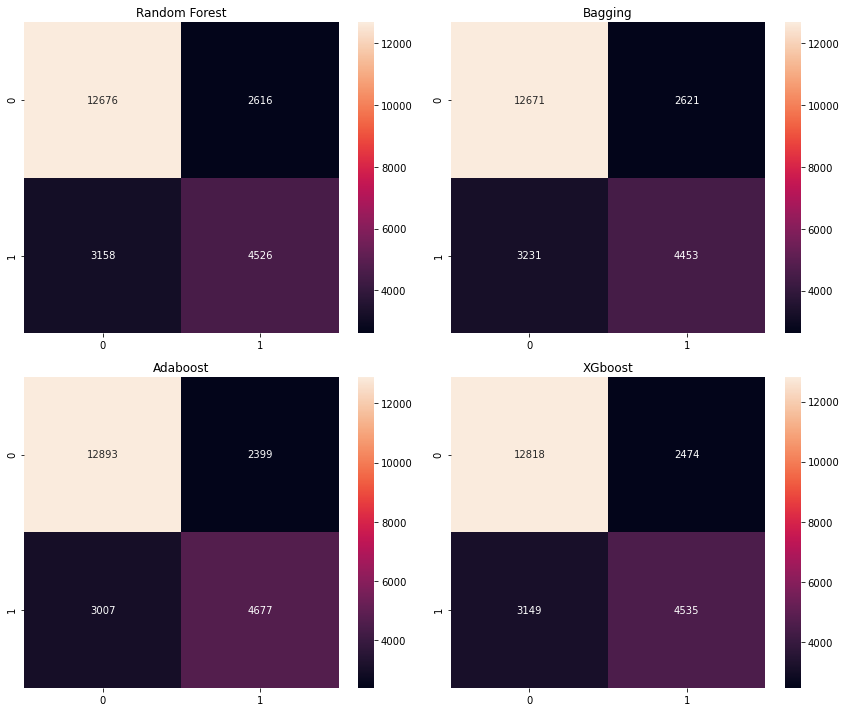

In [53]:
# The confusion matrices

fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');#cmap=colors
    ax.set(title=lab);
    
plt.tight_layout()

In [54]:
# Preparing colors for visualization

coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

StatementMeta(deaudiprod, 54, 54, Finished, Available)

StatementMeta(deaudiprod, 54, 55, Finished, Available)

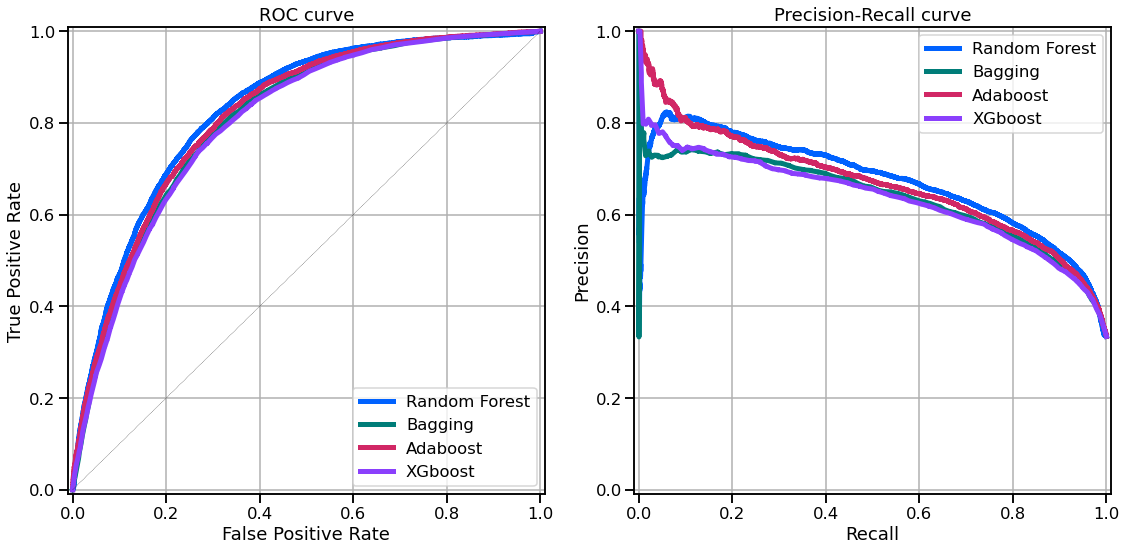

In [55]:
# Plotting the ROC curve and  Precision-Recall curve

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categori
y_prob_AdaBoost = AdaBoost.predict_proba(X_test)
y_prob_RF = RF_Classifier.predict_proba(X_test)
y_prob_XGBoost= XGBoost.predict_proba(X_test)
y_prob_Bagging = Bag.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_AdaBoost[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob_RF[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob_XGBoost[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob_Bagging[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
ax.plot(fpr2, tpr2, color=colors[1], linewidth=5)
ax.plot(fpr3, tpr3, color=colors[2], linewidth=5)
ax.plot(fpr4, tpr4, color=colors[3], linewidth=5)

ax.legend(coeff_labels)

# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test,  y_prob_AdaBoost[:,1])
precision2, recall2, _ = precision_recall_curve(y_test,  y_prob_RF[:,1])
precision3, recall3, _ = precision_recall_curve(y_test,  y_prob_XGBoost[:,1])
precision4, recall4, _ = precision_recall_curve(y_test,  y_prob_Bagging[:,1])
ax.plot(recall, precision, color=colors[0], linewidth=5)
ax.plot(recall2, precision2, color=colors[1], linewidth=5)
ax.plot(recall3, precision3, color=colors[2], linewidth=5)
ax.plot(recall4, precision4, color=colors[3], linewidth=5)
ax.legend(coeff_labels)


ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()



### vi. Save the Model

In [56]:
# save the results to the file
pickle.dump(AdaBoost, open('heart_adaboost.p','wb'))
AdaBoost_Model = pickle.load(open('heart_adaboost.p','rb'))

StatementMeta(deaudiprod, 54, 56, Finished, Available)

### Suggestions for the further analysis


Even thought **AdaBoost** was chosen as my best classifier, it is not doing perfect job in predicting the Heart decease. It predicts correctly only 76% of Heart decease cases, while having quite high false positive rate. Due to that fact, I suggest repeating the analysis with more data and using other resampling techniques and other classification methods, for example Neural Networks.